The purpose of this week's learning has been to work with external datasets and to create visualisations. 

The code below imports a dataset from the UCI archive and uses the data to create visualisations showing population figures and areas occupied across the main land masses in the world. 

There are a number of visualisations that can be created using the data set and, in addition to the population and area numbers, there is much additional data regarding the countries' flags as well as language and religion data. 

In [51]:
import pandas as pd
import altair as alt

dataset = pd.read_csv('flag.csv')

dataset = pd.DataFrame(dataset)

dataset.shape
dataset.head()

,Country,LandMass,Zone,Area,Population (millions),Language,Religion,Bars,Stripes,Colours,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,TopLeft,BotRight
0,Afghanistan,Aisa,NE,648,16,Others,Muslim,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,NE,29,3,Other Indo-European,Marxist,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,NE,2388,20,Arabic,Muslim,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,SW,0,0,English,Other Christian,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,NE,0,0,Other Indo-European,Catholic,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [53]:
areaBarChart = alt.Chart(dataset).mark_bar().encode(x='LandMass', y='Area').interactive()

areaBarChart

alt.Chart(...)

In [54]:
brush = alt.selection_interval()

popPointsChart = alt.Chart(dataset).mark_point().encode(
    x ='Area',
    y ='Population (millions)',
    color = alt.condition(brush, 'LandMass', alt.value('lightgray')),
    tooltip = ['Country','LandMass','Area','Population (millions)']
).add_selection(
    brush
)

popPointsChart

alt.Chart(...)

In [55]:
#create subset of data to exclude outliers

dataset['Area'] = dataset['Area'].astype(int)

AreaDatasetFilter = dataset[dataset['Area'] < 3200]

AreaDatasetFilter.head()

,Country,LandMass,Zone,Area,Population (millions),Language,Religion,Bars,Stripes,Colours,...,Saltires,Quarters,Sunstars,Crescent,Triangle,Icon,Animate,Text,TopLeft,BotRight
0,Afghanistan,Aisa,NE,648,16,Others,Muslim,0,3,5,...,0,0,1,0,0,1,0,0,black,green
1,Albania,Europe,NE,29,3,Other Indo-European,Marxist,0,0,3,...,0,0,1,0,0,0,1,0,red,red
2,Algeria,Africa,NE,2388,20,Arabic,Muslim,2,0,3,...,0,0,1,1,0,0,0,0,green,white
3,American-Samoa,Oceania,SW,0,0,English,Other Christian,0,0,5,...,0,0,0,0,1,1,1,0,blue,red
4,Andorra,Europe,NE,0,0,Other Indo-European,Catholic,3,0,3,...,0,0,0,0,0,0,0,0,blue,red


In [60]:
brush = alt.selection_interval()

filterPopPointsChart1 = alt.Chart(AreaDatasetFilter).mark_point().encode(
    x ='Area',
    y ='Population (millions)',
    color = alt.condition(brush, 'LandMass', alt.value('lightgray')),
    tooltip = ['Country','LandMass','Area','Population (millions)']
).add_selection(
    brush
).interactive()

filterPopPointsChart1

alt.Chart(...)

<AxesSubplot:ylabel='Population (millions)'>

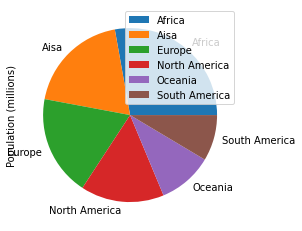

In [57]:
AreaDatasetFilter.groupby('LandMass').count().plot.pie(y='Population (millions)')